In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.datasets import load_iris

## Crear variables

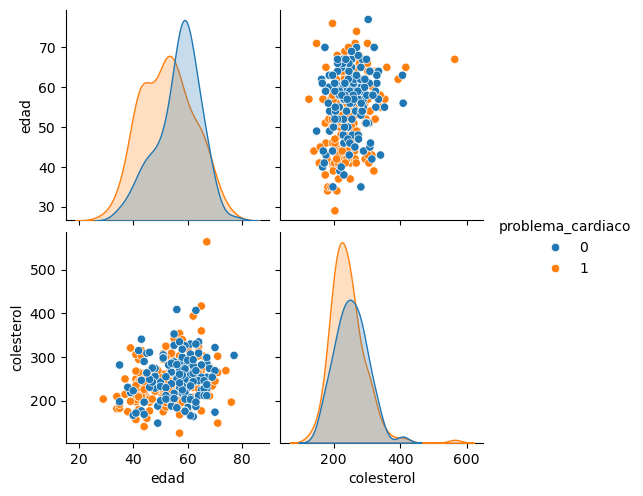

In [32]:
df = pd.read_csv('datasets/Pacientes.csv')
df = df.dropna()
variablex = df[['edad', 'colesterol']].values.reshape((-1,2))
variabley = df[['problema_cardiaco']].values.reshape((-1,1))
sns.pairplot(df, hue="problema_cardiaco")

## Crear arboles de decision

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=2)

modelTree = DecisionTreeClassifier(criterion="gini", max_depth=1)
modelTree.fit(x_train, y_train)

y_pred = modelTree.predict(x_test)
f1 = f1_score(y_test, y_pred)
percent = modelTree.score(x_test, y_test)
print(f'f1_score: {f1}')
print(f'El modelo obtuvo {percent*100}% de precision en la clasificacion')

# Visualizar el arbol

In [ ]:
print(tree.export_text(modelTree, feature_names=["edad", "colesterol"]))

plt.figure(figsize=(12, 12))
tree.plot_tree(modelTree, feature_names=["edad", "colesterol"])
plt.show()

# Matriz de confusion

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

for i in range(len(unique)):
    print(f'Clase {unique[i]}: {counts[i]}')

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=modelTree.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


##### ¿Fue mejor el desempeño del árbol de decisión o el modelo de regresión logistica? ¿Por qué?
El del modelo de regresión logística, obtuvo un porcentaje de precisión del 70%, mientras el arbol de decisión obtuvo sólo el 60%

#### ¿Cómo cambian los resultados del model score y el f1 score obtenidas por el modelo al modificar la máxima profundidad del arbol?
Entre mayor profundidad, se obtuvieron resultados menos precisos.

#### ¿Los resultados obtenidos fueron mejor que los resultados obtenidos en el modelo de regresión logistica? ¿Por qué?
No, no c